## Sentiment Anlaysis Validation

In [1]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import csv 
import os
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import scipy.stats as st

In [18]:
# IMPORT DATA
news_sent = pd.read_csv(r"Data\news_select_companies_with_sent.csv")
news_sent


,Unnamed: 0,id,ticker,title,category,content,release_date,provider,url,article_id,dic_sentiment,dic_sentiment_dis
0,1305,222820,MSFT,Microsoft exposed 250M customer support records,news,Microsoft MSFT 0 1 discloses a database er...,2020-01-23,Seeking Alpha,https://invst.ly/pli4a,2065317,-0.0258,-1
1,1307,222822,MSFT,Microsoft CEO Fears U S China Mistrust Will H...,news,Bloomberg Sign up here to receive the Dav...,2020-01-21,Bloomberg,https://www.investing.com/news/stock-market-ne...,2063837,0.9620,1
2,3760,225275,MSFT,China Coronavirus Sells Off Asian Markets,opinion,Tuesday January 21 2020Market futures are in...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/china-coron...,200500300,0.6584,1
3,3761,225276,MSFT,Tech Daily Facebook Apple Digital Taxes More,opinion,Facebook s NASDAQ FB role in elections and...,2020-01-21,Zacks Investment Research,https://www.investing.com/analysis/tech-daily-...,200500369,0.9970,1
4,3762,225277,MSFT,Chart Of The Day Can IBM s Results Help Avert...,opinion,International Business Machines NYSE IBM is ...,2020-01-21,Pinchas Cohen/Investing.com,https://www.investing.com/analysis/chart-of-th...,200500192,0.0979,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60390,221241,442757,PFE,PSivida Small Cap BioTech Positioned For Long...,opinion,The following small cap company I find very in...,2012-04-18,Scott Matusow,https://www.investing.com/analysis/psivida:-sm...,120599,0.9997,1
60391,221246,442762,PFE,Cheap Is Not Always Good And Stocks As Sweaters,opinion,Cheap Is Not Always GoodThere are many investo...,2011-11-23,Helix Investment Management,https://www.investing.com/analysis/cheap-is-no...,106549,0.9922,1
60392,221247,442763,PFE,PROLOR Biotech A Top Takeover Candidate,opinion,Billionaire Phillip Frost is an esteemed entre...,2011-12-06,Takeover Analyst,https://www.investing.com/analysis/prolor-biot...,107900,0.9941,1
60393,221248,442764,PFE,2 Defensive Dividend Stocks Outperforming The SP,opinion,Looking to play defense in the market As the ...,2011-12-19,Double Dividend Stocks,https://www.investing.com/analysis/2-defensive...,109101,0.9951,1


(array([ 5306.,  1453.,  1096.,   883.,  1506.,   853.,  1296.,  1863.,
         3101., 43038.]),
 array([-9.9990e-01, -7.9991e-01, -5.9992e-01, -3.9993e-01, -1.9994e-01,
         5.0000e-05,  2.0004e-01,  4.0003e-01,  6.0002e-01,  8.0001e-01,
         1.0000e+00]),
 <BarContainer object of 10 artists>)

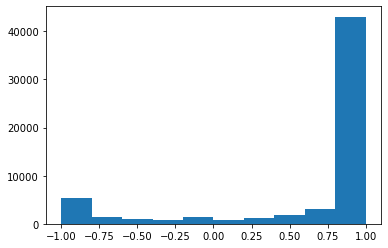

In [19]:
plt.hist(news_sent.dic_sentiment)

In order to test to what extend the chosen `nltk` sentiment analysis algorithm corresponds to reality, two tests will be performed based on a sample of $20$ manually annotated articles. This sample used for validation will be composed by $1$ randomly chosen article for each of the $20$ initially chosen companies (NOTE: these companies may not correspond to the ones used in the final analysis). Atlhough other sampling methods were considered (e.g. sample with same amount of articles per sentiment score interval), this approach was deemed most likely to give representative results of the quality of the overall sentiment measures. 

In [3]:
# CODE TO GENERATE A SAMPLE OF 20 ARTICLES (ONE PER COMPANY) 

sample_articles = pd.DataFrame({'id':np.repeat(0,20),'article':np.repeat(0,20),'score':np.repeat(0,20)})

for i, ticker in enumerate(list(set(news_sent.ticker))):       
    c = random.randint(0,news_sent[news_sent['ticker'] == ticker].shape[0])
    picked_entry = news_sent[news_sent['ticker'] == ticker].iloc[c,:]
    sample_articles.iloc[i,0] = picked_entry['id']
    sample_articles.iloc[i,1] = picked_entry['content']
    sample_articles.iloc[i,2] = picked_entry['dic_sentiment']

# CODE TO SAVE GENERATED SAMPLE
# sample_articles[['id','article']].to_csv('Sample_articles.csv')


In [38]:
# CODE TO READ IN A GIVEN SAMPLE OF ARTICLES 
manual_label = pd.read_csv('Data\Sample_articles.csv')

,Unnamed: 0,id,content,url,h_score
0,376,239973,By David Shepardson Reuters International ...,https://www.investing.com/news/stock-market-ne...,0.820
1,8916,267447,The economy seems like it s been in choppy wat...,https://www.investing.com/analysis/are-you-rea...,0.912
2,8936,267467,By Erwin Seba HOUSTON Reuters About 100 Un...,https://www.investing.com/news/stock-market-ne...,-0.820
3,11347,269916,By Philip Blenkinsop and Martinne Geller BRUSS...,https://www.investing.com/news/stock-market-ne...,0.700
4,12404,271072,Julia Louis Dreyfus signs a multiyear overall ...,https://invst.ly/pjg2s,0.920
5,37395,296107,When eBay NASDAQ EBAY agreed to buy PayPal f...,https://www.investing.com/analysis/what’s-the-...,0.960
6,43524,315931,Reuters Consumer goods giant Unilever Pl...,https://www.investing.com/news/stock-market-ne...,0.870
7,45307,376600,Amazon NASDAQ AMZN is making every effort ...,https://www.investing.com/analysis/amazon-amzn...,0.970
8,47479,384461,New form 4 filings with the SEC have revealed ...,https://www.investing.com/analysis/down-40-in-...,0.940
9,50190,393505,Here is your Bonus Idea with links to the full...,https://www.investing.com/analysis/4-trade-ide...,0.890


The first test evaluates to what extend the human sentiment score is significantly different from the measured score. Analyzing the sentiment of a text is a noise process. Although for text $X$ we observed a certain score, if the text had been written in a slightly different way, even still having the same actual score, we may have measured a slightly different one. We uses a bootstrap procedure to simulate this distribution of possible scores and test if the human sentiment score could have stemed from it with $\alpha = 0.05$. 

In [33]:
# SELECT TEXT (JUST FOR BLUEPRINT)
an_id = manual_label['id'][10]
an_article = str(news_sent[news_sent['id'] == an_id].content.values[0])

50190    0.9676
Name: dic_sentiment, dtype: float64

In [34]:
# FUNCTIONS FOR NEW VERSIONS OF TEXT AND FOR SENTIMENT ANALYSIS 

    # CREATE FREQUENCIES DICTIONARY 
def word_frequencies(text):
    freqs = {}
    list_words = re.sub(' +', ' ', text).split()
    for w in list_words:
        if w in freqs: 
            freqs[w] += 1
        else: 
            freqs[w] = 1
    return freqs

    # CREATE NEW RE-SAMPLED TEXT
def new_text(text):
    freqs = word_frequencies(text)
    length = sum(freqs.values())
    new_words = []

    while len(new_words) < length:
        new_words.append(random.choices(list(freqs.keys()),weights=list(freqs.values()))[0])

    new_text = ' '.join(new_words)
    return new_text

    # SENTIMENT ANALYSIS
def measure_sentiment(text):
    dic_method = SentimentIntensityAnalyzer()
    return dic_method.polarity_scores(text)['compound']



In [35]:
# CREATE THE DISTRIBUTION OF POSSIBLE SENTIMENT SCORES
n = 1000
scores = []

for i in range(n): 
    new_article = new_text(an_article)
    scores.append(measure_sentiment(new_article))

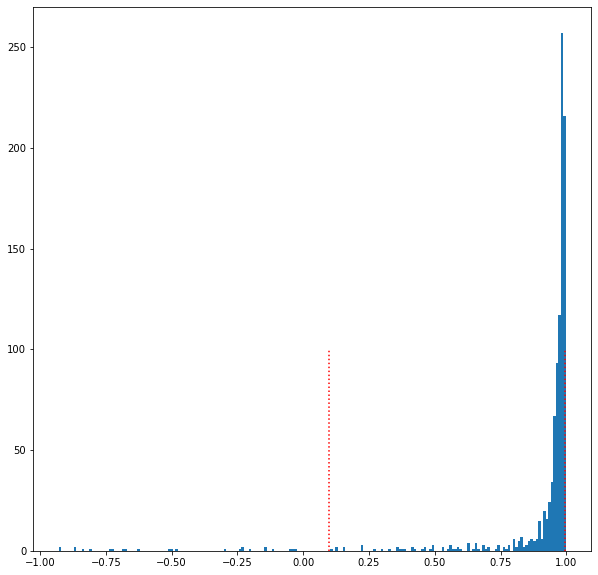

In [36]:
# SAMPLE PLOT
plt.figure(figsize = [10,10])
plt.hist(scores,bins = 200)
plt.vlines(np.percentile(scores,97.5),0,100,linestyles='dotted',color = 'red')
plt.vlines(np.percentile(scores,2.5),0,100,linestyles='dotted',color = 'red')
plt.show()

In light of the unsatisfactory results of the previous test (i.e. sampling distributions ranging from $-1$ to $1$ or having a range of $0.02$), we considera a substitute. This new test would involved computing the *Pearson correlation* between the human score and the measured score for the $20$ sample articles and, through bootstraping, testing if it signifacntly bigger than $0$. **FURTHER ADDED IF RICK LIKES IT**

In [52]:
# VECTOR WITH MESURED SCORES FOR THE SAMPLE
both_scores = news_sent[news_sent['id'].isin(manual_label.id)]
both_scores = both_scores.merge(manual_label,on = 'id')[['dic_sentiment','h_score']]

# USING A TEMPORARY RANDOM HUMAN SCORE
# h_scores = [(0.1+1.2*x)+np.random.normal(0,0.2,1)[0] for x in m_scores]
m_scores = list(both_scores['dic_sentiment'])
h_scores = list(both_scores['h_score'])

# ACUTAL CORRELATION COEFFICIENT
actual_cor = np.corrcoef(h_scores,m_scores)[0][1]
actual_cor

0.6272349287405868

In [53]:
# CREATING A NULL DISTRIBUTION OF CORRELATION VALUES THROUGH BOOTSTRAP

n = 10**4
cor_coefs = []
for i in range(n):
    new_h_scores = random.sample(h_scores,len(h_scores))
    cor_coefs.append(np.corrcoef(m_scores,new_h_scores)[0][1])

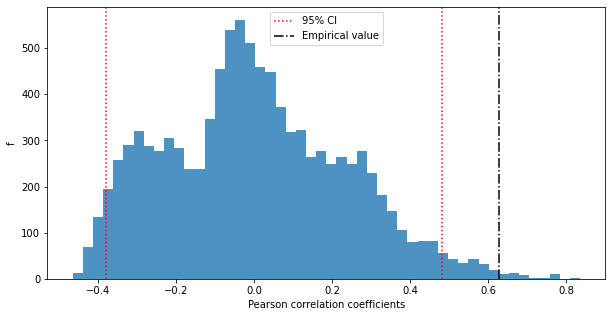

In [54]:
plt.figure(figsize = [10,5])
plt.hist(cor_coefs,bins = 50,alpha = 0.8)
plt.axvline(x = np.percentile(cor_coefs,97.5),color = 'red', linestyle = 'dotted',label = '95% CI')
plt.axvline(x = np.percentile(cor_coefs,2.5),color = 'red', linestyle = 'dotted')
plt.axvline(x = actual_cor,color = 'black', linestyle = 'dashdot',label = 'Empirical value')
plt.xlabel('Pearson correlation coefficients')
plt.ylabel('f')
plt.legend()
plt.show()


A second test will test the (?) precission and bias of the measured score, against the baseline truth of the human score. This will be done by means of a linear regression analysis between these two quantities. 

In [55]:
# DEFINE FUNCTION TO ESTIMATE LINEAR REGRESION PARAMETERS FOR THE SAMPLE
def loglikelihood_lrm(alpha, beta, sigma_y, sample):
    tot_loglike = 0
    for point in sample: 
        x = point[0]
        y = point[1]
        loglike = np.log(st.norm.pdf(y,alpha + x*beta, sigma_y))
        tot_loglike += loglike
        
    return tot_loglike  

def fit_lrm(sample,initial_alpha=1,initial_beta=1, initial_sigma=1):

    params = [initial_alpha,initial_beta,initial_sigma]
    params_like = loglikelihood_lrm(params[0],params[1],params[2],sample)

    variations = [100,10,1,0.5,0.1]
    for var in variations:
        
        for i in range(1000):
            new_params = [np.random.normal(params[0],var),np.random.normal(params[1],var),np.random.normal(params[2],var)]
            new_like = loglikelihood_lrm(new_params[0],new_params[1],new_params[2],sample)

            if new_like > params_like:
                params = new_params
                params_like = new_like

    return params

# ESTIMATE PARAMETERS 

sample = []
for i in range(len(h_scores)):
    sample.append((m_scores[i],h_scores[i]))

params = fit_lrm(sample)
params

C:\Users\user\AppData\Local\Temp/ipykernel_4968/42898963.py:7: RuntimeWarning: divide by zero encountered in log
  loglike = np.log(st.norm.pdf(y,alpha + x*beta, sigma_y))


[0.0656146258904343, 0.6228861103438317, 0.5503572126925735]

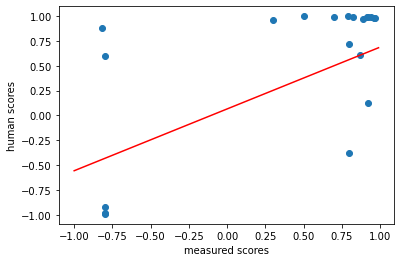

In [56]:
# PLOTTING THE REGRESSIO LINE 
line = [params[0] + params[1]*x for x in np.arange(-1,1,0.01)]

plt.scatter(h_scores,m_scores)
plt.plot(np.arange(-1,1,0.01),line,'r-')
plt.xlabel('measured scores')
plt.ylabel('human scores')
plt.show()
